## <font color='violet'>朴素贝叶斯原理</font>


[朴素贝叶斯综述 | Python 与机器学习 (carefree0910.me)](https://mlblog.carefree0910.me/posts/1607712a/)

### 贝叶斯方法

在已知相关信息的情况下对概率进行估计，不同于“非黑即白、非0即1”的思考方式。

比如，一个人创业，要么成功要么失败，成功概率应为50%，但你如果对他为人比较了解，认为他是有方法、思路清晰、有毅力、且能团结周围的人，你会不由自主地估计他创业成功的几率可能在80%以上。



于是，贝叶斯及贝叶斯派提出了一个思考问题的固定模式：
$$
先验分布 + 样本信息 \Longrightarrow 后验分布
$$

上述思考模式意味着，新观察到的样本信息将修正人们以前对事物的认知。

即在得到新的样本信息之前，人们对事件的认知是先验分布，在得到新的样本信息后，人们对事件的认知为后验分布。


![](https://img-blog.csdnimg.cn/20190322165054524.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L2xlaWRhX3d0,size_16,color_FFFFFF,t_70)

### 贝叶斯决策论

对于一个判定样本类别的问题，设共有 $N$ 个类别，我们要最小化将样本 $x$ 分类为 $c_i$ 所产生的期望损失

$$
R(c_i \mid x) = \sum_{j = 1}^{N} \lambda_{ij} P(c_j \mid x)
$$

其中 $\lambda_{ij}$ 是将真实样本 $c_j$ 判定为 $c_i$ 造成的损失，一般记为 $\lambda_{ij} = 1 - \delta_{ij} = (i\neq j)$ （假设样本相互独立），于是期望损失

$$
R(c_i \mid x) = \sum_{j = 1, j\neq i}^{N} P(c_j \mid x) = 1 - P(c_i \mid x)
$$

要找到判定准则 $h \colon x \mapsto c $ 以最小化总体风险
$$
R(h) = \mathbb{E}_x [R(h(x) \mid x)]
$$

一个**充分条件**是去找 $h$ 最小化每个 $R(h(x) \mid x)$ ，即
$$
h^{*}(x) = \underset{c}{\arg\max} R(c \mid x) = \underset{c}{\arg\max} P(c \mid x)
$$

由贝叶斯定理，可以写成
$$
P(c \mid x) = \dfrac{P(c)P(x \mid c)}{P(x)}
$$

其中 $P(x)$ 与 $c$ 无关，其他需要通过先验知识估计。



### 通过先验知识估计概率

**推导过程：**

- 使用极大似然估计导出条件概率 $P(x\mid c)$ 和先验概率 $P(c)$ （也可以用专家知识）
- 使用极大后验概率估计作为模型的**决策**（输出使得数据后验概率最大化的类别）



#### 极大似然估计

##### 简要介绍

极大似然估计视待估参数为一个未知但**固定**的量、不考虑“观察者”的影响（亦即不考虑先验知识的影响），是传统的频率学派的做法。

我们希望利用训练集 $D$ 估计参数 $\theta_c$ 。其中 $\theta_c$ 是关于类别 $c$ 的条件概率 $P(x \mid c)$ 中确定的参数， 记 $P(x \mid c) = P(x \mid \theta_c)$。

$D_c$ 是样本中类别为 $c$ 的集合， $|D_c| = N_c$ ，假设这些样本独立同分布，则 $\theta_c$ 关于样本 $D_c$ 的似然函数为
$$
P(D_c \mid \theta_c) = \prod_{x \in D_c} P(x \mid \theta_c)
$$

> $\theta_c$ 对应的似然函数越大，我们越承认它符合样本的分布

接下来用对数似然对 $\theta_c$ 进行极大似然估计
$$
LL(\theta_c) \coloneqq \log P(D_c \mid \theta_c) = \sum_{x\in D_c} \log P(x \mid \theta_c)\\
\hat{\theta}_c = \underset{\theta_c}{\arg\max} LL(\theta_c)
$$

##### 计算公式

###### 二项式分布（BernoulliNB）

对每个样本我们有概率质量函数
$$
P(x \mid \theta) = \theta^{x} (1 - \theta)^{1-x},\quad (x = 0, 1)
$$

于是
$$
LL(\theta) = (\sum_{i=1}^{N_c}x_i) \log \theta + (N_c - \sum_{i=1}^{N_c}x_i) \log (1-\theta)
$$

令 $\dfrac{d LL}{d \theta} = 0$ ，即得 $\hat{\theta} = \dfrac{\sum_{i=1}^{N_c}x_i}{N_c}$

###### 多项式分布（MultinomialNB）

事件有多个状态（$K$ 个状态），并且状态之间互斥，设每种状态出现的概率为 $\theta_i$，并且 $\sum_{i=1}^{K}\theta_i = 1$ 。则多项分布对应的概率质量函数为
$$
P(x^1,\cdots, x^K \mid \theta_1,\cdots,\theta_K) = \prod_{i=1}^{K} \theta_i^{x^i}, \quad (x^i 仅有一个为1，其他均为0)
$$

$$
LL(\theta) = \sum_{j=1}^{K} \log \theta_j (\sum_{i=1}^{N_c} x_{i}^{\ j})
$$

由于 $\sum_{j=1}^{K}\theta_j = 1$ ，利用Lagrange乘子法可得 $\hat{\theta}_j = \dfrac{\sum_{i=1}^{N_c} x_i^{\ j}}{N_c}$

> $x_i^{\ j}$ 下标样本，上标属性 ；上面得到的即为离散情况下的条件概率 $P(x^{j} \mid c)$ （表示第 $j$ 个属性上的状态为 $x^{j}$ ）

###### 高斯分布（GaussianNB）

概率密度函数
$$
P(x \mid \theta) = \dfrac{1}{\sqrt{2\pi} \sigma} \exp \left(-\dfrac{(x-\mu)^2}{2\sigma^2} \right)
$$

同理得到 $\hat{\mu} = \dfrac{\sum_{i=1}^{N_c}x_i}{N_c}, \hat{\sigma}^2 = \dfrac{\sum_{i=1}^{N_c} (x_i - \hat{\mu})^2}{N_c}$



#### 朴素贝叶斯 & 极大后验概率估计

基于先验知识，我们利用极大后验概率估计，对测试样本 $x$ 进行分类

朴素贝叶斯有**属性独立性假设：所有属性相互独立**，设一共有 $d$ 个属性，于是
$$
P(c \mid x) = \dfrac{P(c)P(x \mid c)}{P(x)} = \dfrac{P(c)}{P(x)} \prod_{i = 1}^{d} P(x^{i} \mid c)
$$

基于此
$$
h^{*}(x) = \underset{c}{\arg\max} P(c \mid x) = \underset{c}{\arg\max} P(c) \prod_{i = 1}^{K} P(x^{i} \mid c)
$$

**为什么我们要用朴素贝叶斯？**

机器学习所要实现的是基于有限的训练样本集尽可能准确地估计出后验概率 $P(c\mid x)$. 大体来说，主要有两种策略：

- 给定 $x$ 可以通过直接建模 $P(c\mid x)$ 来预测 $c$ ，称这样的方式“**判别式模型**”，例如决策树、SVM、BP神经网络等
- 先对联合概率分布 $P(x, c)$ 建模，然后由此得到 $P(c \mid x)$ ,称这样的方式为“**生成式模型**”，如朴素贝叶斯及其衍生方法。

> 总结来说，贝叶斯分类器（朴素贝叶斯,SPODE,AODE,TAN,贝叶斯网络）是从样本推测出总体模型，更加具备可解释性（或称为协调性假说：我们选择的参数 $\theta$ 的先验分布、应该与由它和训练集确定的后验分布属同一类型）



对于离散型数据，根据上述推导有
$$
P(c) = \dfrac{|D_c|}{|D|}; \quad P(x^{i} \mid c) = \dfrac{|D_{c,x^i}|}{|D_c|}
$$



一般为了改进稀疏数据情形，加入Laplace平滑项修正为
$$
\hat{P}(c) = \dfrac{|D_c| + \alpha}{|D| + \alpha N}; \quad \hat{P}(x^{i} \mid c) = \dfrac{|D_{c,x^i}|  + \alpha}{|D_c| + \alpha N_i}
$$

一般取 $\alpha = 1$ （但有时候调整 $\alpha \in [1e-10, 1]$ 有奇效）。其中 $N$ 为 $D$ 中总的类别数， $N_i$ 为第 $i$ 个属性可能的取值个数。该修正暗含属性值与类别均匀分布的假设。（显然，样本足够大时修正项可以忽略）



## <font color='violet'>sklearn实战</font>

> https://scikit-learn.org/stable/modules/naive_bayes.html

- GaussianNB: 连续变量，高斯分布
- MultinomialNB: 离散变量，多项分布
- BernoulliNB: 二项分布

### **GaussianNB（连续型数据）**

高斯朴素贝叶斯，特征变量是**连续变量**，（假设）符合<font color='violet'>高斯分布</font>，比如说人的身高，物体的长度。这种模型假设特征符合高斯分布。

如鸢尾花，每个种类分别对应的各属性满足高斯分布

**参数：**

- priors: array-like of shape (n_classes,) ：先验概率


注：
GaussianNB一个重要的功能是有 partial_fit方法，这个方法的一般用在如果训练集数据量非常大，一次不能全部载入内存的时候。这时我们可以把训练集分成若干等分，重复调用partial_fit来一步步的学习训练集，非常方便。后面讲到的MultinomialNB和BernoulliNB也有类似的功能。

数据集选用连续型Iris：

![](https://cdn.jsdelivr.net/gh/acryan54/images@main/pic/202211242206140.png)

In [1]:
import numpy as np
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

print(X.shape)
print(np.column_stack([X, y])[:10])
print(np.bincount(y)) # 统计0,1,2的个数

(150, 4)
[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [4.6 3.1 1.5 0.2 0. ]
 [5.  3.6 1.4 0.2 0. ]
 [5.4 3.9 1.7 0.4 0. ]
 [4.6 3.4 1.4 0.3 0. ]
 [5.  3.4 1.5 0.2 0. ]
 [4.4 2.9 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]]
[50 50 50]


补充：这里的np.bincount()函数的作用相当于画出直方图

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB


X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
print(X_train.shape, X_test.shape)
clf = GaussianNB().fit(X_train, y_train)
print(clf.n_features_in_)
print(clf.class_count_, clf.class_count_/clf.class_count_.sum())
print(clf.class_prior_) # 类先验概率（用频率估计）
clf.var_, clf.theta_ # classes * features 对应的参数（方差，平均值）

(90, 4) (60, 4)
4
[34. 27. 29.] [0.37777778 0.3        0.32222222]
[0.37777778 0.3        0.32222222]


(array([[0.12584775, 0.153218  , 0.02013841, 0.00865917],
        [0.24282579, 0.0902332 , 0.23135803, 0.0392867 ],
        [0.39143877, 0.10145066, 0.30271106, 0.04832343]]),
 array([[4.99411765, 3.38235294, 1.45294118, 0.23235294],
        [5.92962963, 2.77037037, 4.21111111, 1.31851852],
        [6.74482759, 3.06896552, 5.70689655, 2.08275862]]))

In [3]:
print(clf.predict_log_proba(X_test[:5])) # LL
print(clf.predict_log_proba(X_test[:5]).argmax(axis=1))
print(clf.predict(X_test[:5]))
print(y_test[:5])

[[-5.99359013e+02 -1.30221934e+01 -2.21072006e-06]
 [-1.98209762e+02 -8.06044120e-09 -1.86362976e+01]
 [ 0.00000000e+00 -4.36488013e+01 -7.50070050e+01]
 [-7.42421795e+02 -1.39339296e+01 -8.88324119e-07]
 [ 0.00000000e+00 -3.79380805e+01 -7.29574064e+01]]
[2 1 0 2 0]
[2 1 0 2 0]
[2 1 0 2 0]


In [4]:
"""
GaussianNB, 处理连续型数据
"""
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB


X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) # test_size表示测试集大小，ramdom_state为随机种子
clf = GaussianNB().fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Number of mislabeled points out of a total %s points : %s"
      % (X_test.shape[0], (y_test != y_pred).sum()))
print("Accuracy : %.4f"
      % clf.score(X_test, y_test))

Number of mislabeled points out of a total 60 points : 3
Accuracy : 0.9500


### **MultinomialNB（离散型数据）**

特征变量是离散变量，符合<font color=violet>多项式分布</font>，在文档分类中特征变量体现在一个单词出现的次数。不支持负数，所以输入变量特征的时候，别用StandardScaler进行标准化数据，可以使用MinMaxScaler进行归一化。这个模型假设特征符合多项式分布，是一种非常典型的文本分类模型，模型内部带有**平滑参数**

**参数：**

- alpha: float, default=1.0：平滑项，可以取0表示不用平滑

- fit_prior: bool, default=True：先验概率

- class_prior: array-like of shape (n_classes,), default=None

数据集选用离散类型Mushroom：> https://archive.ics.uci.edu/ml/datasets/Mushroom

In [1]:
"""
LabelEncoder编码X
"""
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB

data = pd.read_csv("mushroom.csv", header=None, na_values=['?'])
data.dropna(inplace=True) # 删去缺失值行
# data.dropna(axis=1, inplace=True) # 删去attribute #11

y = data.values[:, 0]
enc_y = LabelEncoder()
y = enc_y.fit_transform(y)

X = data.values[:, 1:]
print(X.shape)
encs_x = []
for i in range(X.shape[1]):
    enc = LabelEncoder()
    X[:, i] = enc.fit_transform(X[:, i])
    encs_x.append(enc)
print(X.shape)
print(X[:5])
print([encs_x[i].classes_ for i in range(3)]) # 编码方式

# data.head()
# enc_y.classes_
# y

(5644, 22)
(5644, 22)
[[5 2 4 1 6 1 0 1 2 0 2 2 2 5 5 0 0 1 3 1 3 5]
 [5 2 7 1 0 1 0 0 2 0 1 2 2 5 5 0 0 1 3 2 2 1]
 [0 2 6 1 3 1 0 0 3 0 1 2 2 5 5 0 0 1 3 2 2 3]
 [5 3 6 1 6 1 0 1 3 0 2 2 2 5 5 0 0 1 3 1 3 5]
 [5 2 3 0 5 1 1 0 2 1 2 2 2 5 5 0 0 1 0 2 0 1]]
[array(['b', 'c', 'f', 'k', 's', 'x'], dtype=object), array(['f', 'g', 's', 'y'], dtype=object), array(['b', 'c', 'e', 'g', 'n', 'p', 'w', 'y'], dtype=object)]


In [2]:
"""
MultinomialNB, LabelEncoder, 处理离散型数据
"""
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB


data = pd.read_csv("mushroom.csv", header=None, na_values=['?'])
data.dropna(inplace=True) # 删去缺失值行
# data.dropna(axis=1, inplace=True) # 删去attribute #11

y = data.values[:, 0]
enc_y = LabelEncoder()
y = enc_y.fit_transform(y)

X = data.values[:, 1:]
encs_x = []
for i in range(X.shape[1]):
    enc = LabelEncoder()
    X[:, i] = enc.fit_transform(X[:, i])
    encs_x.append(enc)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
clf = MultinomialNB(alpha=1e-10).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Number of mislabeled points out of a total %s points : %s"
      % (X_test.shape[0], (y_test != y_pred).sum()))
print("Accuracy : %.4f"
      % clf.score(X_test, y_test))

Number of mislabeled points out of a total 1694 points : 233
Accuracy : 0.8625


In [3]:
"""
GaussianNB, LabelEncoder, 处理离散型数据
"""
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB


data = pd.read_csv("mushroom.csv", header=None, na_values=['?'])
data.dropna(inplace=True) # 删去缺失值行
# data.dropna(axis=1, inplace=True) # 删去attribute #11

y = data.values[:, 0]
enc_y = LabelEncoder()
y = enc_y.fit_transform(y)

X = data.values[:, 1:]
encs_x = []
for i in range(X.shape[1]):
    enc = LabelEncoder()
    X[:, i] = enc.fit_transform(X[:, i])
    encs_x.append(enc)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
clf = GaussianNB().fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Number of mislabeled points out of a total %s points : %s"
      % (X_test.shape[0], (y_test != y_pred).sum()))
print("Accuracy : %.4f"
      % clf.score(X_test, y_test))

Number of mislabeled points out of a total 1694 points : 486
Accuracy : 0.7131


In [4]:
"""
OneHotEncoder编码X
"""
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.naive_bayes import MultinomialNB


data = pd.read_csv("mushroom.csv", header=None, na_values=['?'])
data.dropna(inplace=True) # 删去缺失值行
# data.dropna(axis=1, inplace=True) # 删去attribute #11

y = data.values[:, 0]
enc_y = LabelEncoder()
y = enc_y.fit_transform(y)
print(enc_y.classes_)

X = data.values[:, 1:]
print(X.shape)
enc_x = OneHotEncoder()
X = enc_x.fit_transform(X)
# X = enc_x.fit_transform(X).toarray()
print(X.shape) # 维数扩张，特征变为98个
print(enc_x.categories_[:3])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
clf = MultinomialNB().fit(X_train, y_train)

print("#"*50)
print(clf.class_log_prior_) # 先验概率
print(clf.class_count_) # 
print(clf.feature_log_prob_) # classes * features 对应的参数（p_ij）

['e' 'p']
(5644, 22)
(5644, 98)
[array(['b', 'c', 'f', 'k', 's', 'x'], dtype=object), array(['f', 'g', 's', 'y'], dtype=object), array(['b', 'c', 'e', 'g', 'n', 'p', 'w', 'y'], dtype=object)]
##################################################
[-0.48376882 -0.95830014]
[2435. 1515.]
[[ -5.68108605 -10.8905722   -3.95617499  -8.00020044  -7.79952975
   -3.80886361  -3.9948895  -10.8905722   -4.69820971  -4.02259779
  -10.8905722   -7.71251837  -4.88915732  -4.44010178  -4.33095696
   -9.09881273  -4.92186464  -5.26295109  -4.40288818  -3.40620356
   -5.2738011  -10.8905722  -10.8905722   -5.26295109 -10.8905722
   -3.3488891  -10.8905722  -10.8905722   -3.09245957  -3.4006013
   -4.41822591  -3.16435955  -5.75477376  -6.27545168  -5.9207589
   -5.38118386  -4.48534374  -4.65029635 -10.8905722   -5.17026042
   -4.62337165 -10.8905722   -4.45602568  -3.38728257  -3.68865588
   -5.04124742  -4.47383992  -5.96331851  -5.20359684 -10.8905722
   -3.22622557  -8.40566555  -5.18678973 -10.890572

In [5]:
"""
MultinomialNB, OneHotEncoder, 处理离散型数据
"""
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.naive_bayes import MultinomialNB


data = pd.read_csv("mushroom.csv", header=None, na_values=['?'])
data.dropna(inplace=True) # 删去缺失值行
# data.dropna(axis=1, inplace=True) # 删去attribute #11

y = data.values[:, 0]
enc_y = LabelEncoder()
y = enc_y.fit_transform(y)

X = data.values[:, 1:]
enc_x = OneHotEncoder()
X = enc_x.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99, random_state=1896)
clf = MultinomialNB(alpha=1e-10).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Number of mislabeled points out of a total %s points : %s"
      % (X_test.shape[0], (y_test != y_pred).sum()))
print("Accuracy : %.4f"
      % clf.score(X_test, y_test))

Number of mislabeled points out of a total 5588 points : 220
Accuracy : 0.9606


In [6]:
"""
GaussianNB, OneHotEncoder, 处理离散型数据
"""
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.naive_bayes import GaussianNB


data = pd.read_csv("mushroom.csv", header=None, na_values=['?'])
data.dropna(inplace=True) # 删去缺失值行
# data.dropna(axis=1, inplace=True) # 删去attribute #11

y = data.values[:, 0]
enc_y = LabelEncoder()
y = enc_y.fit_transform(y)

X = data.values[:, 1:]
enc_x = OneHotEncoder()
X = enc_x.fit_transform(X).toarray() # 返回结果是稀疏矩阵，必须转换成dense
# X = enc_x.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
clf = GaussianNB().fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Number of mislabeled points out of a total %s points : %s"
      % (X_test.shape[0], (y_test != y_pred).sum()))
print("Accuracy : %.4f"
      % clf.score(X_test, y_test))

Number of mislabeled points out of a total 1694 points : 3
Accuracy : 0.9982


In [7]:
"""
BernoulliNB, OneHotEncoder, 处理离散型数据
"""
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.naive_bayes import BernoulliNB


data = pd.read_csv("mushroom.csv", header=None, na_values=['?'])
data.dropna(inplace=True) # 删去缺失值行
# data.dropna(axis=1, inplace=True) # 删去attribute #11

y = data.values[:, 0]
enc_y = LabelEncoder()
y = enc_y.fit_transform(y)

X = data.values[:, 1:]
enc_x = OneHotEncoder()
X = enc_x.fit_transform(X).toarray() # 不能用稀疏矩阵，必须dense
# X = enc_x.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
clf = BernoulliNB(alpha=1e-10).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Number of mislabeled points out of a total %s points : %s"
      % (X_test.shape[0], (y_test != y_pred).sum()))
print("Accuracy : %.4f"
      % clf.score(X_test, y_test))

# np.bincount(y)

Number of mislabeled points out of a total 1694 points : 5
Accuracy : 0.9970


**提出一些问题：**

- 平滑项的作用
  - （人工调整）
- <font color='violet'>为什么LabelEncoder比OnehotEncoder表现更差？</font>
  - （用OneHotEncoder甚至还破坏了属性间的独立性，理论上解释性更差）（应该是**数据太好了**【侯力广】）
  - 可以算相关系数看数据特性
- 为什么有时候GaussianNB会表现不错？
  - （因为OneHot编码下满足Gauss分布（方差<<1））

count    97.000000
mean      0.013105
std       0.287453
min      -0.709304
25%      -0.171373
50%       0.010297
75%       0.144585
max       0.794472
Name: 0, dtype: float64


<AxesSubplot:>

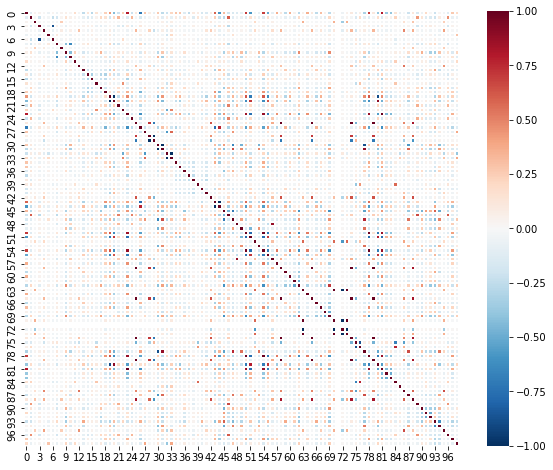

In [8]:
"""
求相关系数
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns
from matplotlib import cm


data = pd.read_csv("mushroom.csv", header=None, na_values=['?'])
data.dropna(inplace=True) # 删去缺失值行

y = data.values[:, 0]
enc_y = LabelEncoder()
y = enc_y.fit_transform(y)

X = data.values[:, 1:]
enc_x = OneHotEncoder()
X = enc_x.fit_transform(X).toarray()

data = np.column_stack([y, X])
data = pd.DataFrame(data)
data_corr = data.corr()
cov_y = data_corr.iloc[0, 1:]
print(cov_y.describe()) # 描述各个属性与y的相关系数

# 画相关系数热力图
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data_corr, annot=False, vmin=-1, vmax=1, square=True, cmap='RdBu_r', fmt='.2g', linewidths=0.01, ax=ax)

In [9]:
"""
这里我们只看第一行，发现各有4个数据和label呈强正（/负）相关性
其中相关性最强的接近80%
"""
print(enc_x.categories_)
cnt = []
for i in enc_x.categories_:
    cnt.append(len(i))
cnt = np.array(cnt)
cnt_sum = cnt.cumsum()
print(cnt_sum) # 打印出各个类别的前缀和，方便查询


cov_y_sorted = cov_y.sort_values()
print(cov_y_sorted.iloc[[0, -5, -4, -3, -2]])
cols = np.hstack(enc_x.categories_)
# print(cols)
idx = cov_y_sorted.index.to_numpy()
print(cols[idx[0]], cols[idx[-5:-1]])

[array(['b', 'c', 'f', 'k', 's', 'x'], dtype=object), array(['f', 'g', 's', 'y'], dtype=object), array(['b', 'c', 'e', 'g', 'n', 'p', 'w', 'y'], dtype=object), array(['f', 't'], dtype=object), array(['a', 'c', 'f', 'l', 'm', 'n', 'p'], dtype=object), array(['a', 'f'], dtype=object), array(['c', 'w'], dtype=object), array(['b', 'n'], dtype=object), array(['g', 'h', 'k', 'n', 'p', 'r', 'u', 'w', 'y'], dtype=object), array(['e', 't'], dtype=object), array(['b', 'c', 'e', 'r'], dtype=object), array(['f', 'k', 's', 'y'], dtype=object), array(['f', 'k', 's', 'y'], dtype=object), array(['b', 'c', 'g', 'n', 'p', 'w', 'y'], dtype=object), array(['b', 'c', 'g', 'n', 'p', 'w', 'y'], dtype=object), array(['p'], dtype=object), array(['w', 'y'], dtype=object), array(['n', 'o', 't'], dtype=object), array(['e', 'l', 'n', 'p'], dtype=object), array(['h', 'k', 'n', 'r', 'u', 'w'], dtype=object), array(['a', 'c', 'n', 's', 'v', 'y'], dtype=object), array(['d', 'g', 'l', 'm', 'p', 'u'], dtype=object)]
[ 6

通过对照下标得到：

| 编号 | 相关系数  | 特性                   | 可否食用（0=e,1=p） |
| ---- | --------- | ---------------------- | ------------------- |
| 26   | -0.709304 | 5气味：刺激性          | 可                  |
| 54   | 0.694419  | 13菌环下方茎表面：光滑 | 不可                |
| 50   | 0.794472  | 12菌环上方茎表面：光滑 | 不可                |
| 81   | 0.794472  | 20孢子颜色：黑色       | 不可                |
| 23   | 0.794472  | 5气味：茴香味          | 不可                |

In [10]:
"""横向对比
[GaussianNB, MultinomialNB, BernoulliNB], OneHotEncoder, 处理离散型数据, 交叉验证
"""
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB


data = pd.read_csv("mushroom.csv", header=None, na_values=['?'])
data.dropna(inplace=True) # 删去缺失值行
# data.dropna(axis=1, inplace=True) # 删去attribute #11

y = data.values[:, 0]
enc_y = LabelEncoder()
y = enc_y.fit_transform(y)
# print(enc_y.classes_)

X = data.values[:, 1:]
enc_x = OneHotEncoder()
X = enc_x.fit_transform(X).toarray()
# print(enc_x.categories_[:3])

clf1 = GaussianNB()
clf2 = MultinomialNB(alpha=1e-10)
clf3 = BernoulliNB(alpha=1e-10)
for model in [clf1, clf2, clf3]:
    scores = cross_val_score(model, X, y, cv=10) # 交叉验证准确度
    print("Accuracy:{:.4f}".format(scores.mean()))

Accuracy:0.9823
Accuracy:0.9816
Accuracy:0.9823


### ComplementNB（略）

是MultinomialNB模型的一个变种，实现了补码朴素贝叶斯(CNB)算法。CNB是标准多项式朴素贝叶斯(MNB)算法的一种改进，比较**适用于不平衡的数据集**，在文本分类上的结果通常比MultinomialNB模型好，具体来说，CNB使用来自每个类的补数的统计数据来计算模型的权重。CNB的发明者的研究表明，CNB的参数估计比MNB的参数估计更稳定。

### BernoulliNB（略）

模型适用于<font color=violet>多元伯努利分布</font>，即每个特征都是二值变量，如果不是二值变量，该模型可以先对变量进行**二值化**，在文档分类中特征是单词是否出现，如果该单词在某文件中出现了即为1，否则为0。在文本分类的示例中，统计词语是否出现的向量(word occurrence vectors)(而非统计词语出现次数的向量(word count vectors))可以用于训练和使用这个分类器。 BernoulliNB 可能在一些数据集上表现得更好，特别是那些更短的文档。 如果时间允许，建议对两个模型都进行评估。

BernoulliNB一共有4个参数，其中3个参数的名字和意义和MultinomialNB完全相同。唯一增加的一个参数是binarize。这个参数主要是用来帮BernoulliNB处理二项分布的，可以是数值或者不输入。如果不输入，则BernoulliNB认为每个数据特征都已经是二元的。否则的话，小于binarize的会归为一类，大于binarize的会归为另外一类。

### CategoricalNB（略）

对分类分布的数据实施分类朴素贝叶斯算法，专用于**离散数据集**， 它假定由索引描述的每个特征都有其自己的分类分布。对于训练集中的每个特征 X，CategoricalNB估计以类y为条件的X的每个特征i的分类分布。 样本的索引集定义为J=1,…,m，m作为样本数。

### **连续特征离散化（混合型数据）**

> [面试题解答15：关于朴素贝叶斯中的异常值，缺失值和连续值 - 知乎 (zhihu.com)](https://zhuanlan.zhihu.com/p/474727476)
>
> [机器学习中，有哪些特征选择的工程方法？ - 知乎 (zhihu.com)](https://www.zhihu.com/question/28641663)

由于朴素贝叶斯需要对每一个特征中的每一个取值计算其条件概率，因此如果某个特征的取值是连续值，但依然以离散值的方法进行计算，则很容易造成该特征的条件概率极小，以及十分水平的分布，另外，当对样本进行预测时，也十分容易出现没有囊括在模型中的值。因此，面对连续值时不能简单地处理，以下为常用的两种处理方式：

1. 假设该特征取值符合高斯分布在该假设条件下，我们可以计算样本中该特征的平均值和标准差，然后作为参数带入高斯分布中，即可得到该特征的高斯分布的概率分布曲线，当对新的样本进行预测时，即使在该特征中出现了未曾出现过的值，也可以通过高斯分布曲线获得其出现概率。

   但需要注意，这一切都**基于特征符合高斯分布的假设**，但往往特征未必符合高斯分布，退一万步讲，即使符合高斯分布，在**样本数量较少时，也很难得到其准确的概率分布曲线**，当出现异常值时，也会使得高斯分布发生偏移，进而得到不准确的条件概率。

2. 因此相对于这一方法，对<font color='violet'>连续值的离散化</font>是更常用的方式。

   对连续特征进行离散化，不仅能够方便模型处理这一特征，也能够**增加模型的泛化能力**，同时，如果出现异常值，这一异常值也会被分入最左边或者最右边的桶中，**减少了异常值对模型的影响**。有效的离散化能减小算法的时间和空间开销，提高系统对样本的分类聚类能力和抗噪声能力。

> [机器学习——连续型特征离散化_兔子爱读书的博客-CSDN博客](https://blog.csdn.net/ztf312/article/details/53991329)
>
> [机器学习处理数据为什么把连续性特征离散化 - 知乎 (zhihu.com)](https://zhuanlan.zhihu.com/p/91118653)

**无监督方法：**

1. 等宽离散化

2. 等频离散化

3. 利用聚类进行离散化

**有监督方法：**（略）

1. 卡方检验

2. 信息增益

数据集Adult > https://archive.ics.uci.edu/ml/datasets/Adult

class(>50K, <=50K): 根据人口普查数据预测收入是否超过每年50000美元

In [11]:
"""效果较差
GaussianNB, OneHotEncoder, 处理混合型数据
"""
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.naive_bayes import GaussianNB


data = pd.read_csv("adult.csv", header=None, na_values=['？', '?', ' ？', ' ?'])
# print(data.shape)
data.dropna(inplace=True) # 删去缺失值行
# print(data.shape)


y = data.values[:, -1]
enc_y = LabelEncoder()
y = enc_y.fit_transform(y)

idx1 = [0,2,4,10,11,12] # 连续型
idx2 = [1,3,5,6,7,8,9,13] # 离散型
X1 = data.values[:, idx1]
X2 = data.values[:, idx2]
enc_x = OneHotEncoder()
X2 = enc_x.fit_transform(X2).toarray()
X = np.hstack([X1, X2])
print(X.shape)
# print(X[:2])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
clf = GaussianNB().fit(X_train, y_train)
y_pred = clf.predict(X_test)
# print("#"*50)
print("Number of mislabeled points out of a total %s points : %s"
      % (X_test.shape[0], (y_test != y_pred).sum()))
print("Accuracy : %.4f"
      % clf.score(X_test, y_test))

(30162, 104)
Number of mislabeled points out of a total 9049 points : 1961
Accuracy : 0.7833


In [12]:
"""效果较差
MultinomialNB, OneHotEncoder, 处理混合型数据
"""
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.naive_bayes import MultinomialNB


data = pd.read_csv("adult.csv", header=None, na_values=['？', '?', ' ？', ' ?'])
data.dropna(inplace=True) # 删去缺失值行


y = data.values[:, -1]
enc_y = LabelEncoder()
y = enc_y.fit_transform(y)

idx1 = [0,2,4,10,11,12] # 连续型
idx2 = [1,3,5,6,7,8,9,13] # 离散型
X1 = data.values[:, idx1]
X2 = data.values[:, idx2]
enc_x = OneHotEncoder()
X2 = enc_x.fit_transform(X2).toarray()
X = np.hstack([X1, X2])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
clf = MultinomialNB(alpha=1e-10).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Number of mislabeled points out of a total %s points : %s"
      % (X_test.shape[0], (y_test != y_pred).sum()))
print("Accuracy : %.4f"
      % clf.score(X_test, y_test))

Number of mislabeled points out of a total 9049 points : 2083
Accuracy : 0.7698


In [13]:
"""效果很差（离散化了之后还是不要用GaussianNB）
GaussianNB, 离散化, OneHotEncoder, 处理混合型数据
"""
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans

# 数据清洗
data = pd.read_csv("adult.csv", header=None, na_values=['？', '?', ' ？', ' ?'])
data.dropna(inplace=True) # 删去缺失值行


def discretize(data, k=5): # 离散化
    data = pd.Series(data)
    return pd.cut(data, k, labels=range(k))


# 对class进行编码(1, 2)
y = data.values[:, -1]
enc_y = LabelEncoder()
y = enc_y.fit_transform(y)

# 对X编码（连续转离散，OneHot）
X = data.values[:, :-1]
print(X.shape)
idx1 = [0,2,4,10,11,12] # 连续型
for i in idx1:
    X[:, i] = discretize(X[:, i])
enc_x = OneHotEncoder()
X = enc_x.fit_transform(X).toarray()
print(X.shape)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
clf = GaussianNB().fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("#"*50)
print("Number of mislabeled points out of a total %s points : %s"
      % (X_test.shape[0], (y_test != y_pred).sum()))
print("Accuracy : %.4f"
      % clf.score(X_test, y_test))

(30162, 14)
(30162, 127)
##################################################
Number of mislabeled points out of a total 9049 points : 4358
Accuracy : 0.5184


In [14]:
"""效果很好
MultinomialNB, 离散化, OneHotEncoder, 处理混合型数据
"""
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans

# 数据清洗
data = pd.read_csv("adult.csv", header=None, na_values=['？', '?', ' ？', ' ?'])
data.dropna(inplace=True) # 删去缺失值行


def discretize(data, k=4): # 离散化
    data = pd.Series(data).astype(float)
    # 等宽
    return pd.cut(data, k, labels=range(k))

    # 聚类
    # kmodel = KMeans(n_clusters = k).fit(data.values.reshape(-1, 1))
    # c = pd.DataFrame(kmodel.cluster_centers_).sort_values(by=0) # 输出聚类中心，并且排序
    # w = c.rolling(2).mean().iloc[1:] # 相邻两项求中点，作为边界点
    # w = [0] + list(w[0]) + [data.max()] # 加上首末边界点
    # return pd.cut(data, w, labels=range(k))


# 对class进行编码(1, 2)
y = data.values[:, -1]
enc_y = LabelEncoder()
y = enc_y.fit_transform(y)

# 对X编码（连续转离散，OneHot）
X = data.values[:, :-1]
print(X.shape)
idx1 = [0,2,4,10,11,12] # 连续型
for i in idx1:
    X[:, i] = discretize(X[:, i])
enc_x = OneHotEncoder()
X = enc_x.fit_transform(X).toarray()
print(X.shape)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
clf = MultinomialNB(alpha=1).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("#"*50)
print("Number of mislabeled points out of a total %s points : %s"
      % (X_test.shape[0], (y_test != y_pred).sum()))
print("Accuracy : %.4f"
      % clf.score(X_test, y_test))

(30162, 14)
(30162, 121)
##################################################
Number of mislabeled points out of a total 9049 points : 1736
Accuracy : 0.8082


random_state = 0, alpha = 1

Accuracy : 0.8090 等宽 k=3

Accuracy : 0.8082 等宽 k=4

Accuracy : 0.8169 聚类 k=3

Accuracy : 0.8204 聚类 k=4

可以改ramdom_state，结果在0.81-0.82左右（要更准确的评估Accuracy就用cross_val_score）

In [16]:
"""根据讨论班上同学的建议，此处对 连续属性离散化，对离散属性OneHot;;;但结果并没有更优秀
MultinomialNB, 离散化, OneHotEncoder, 处理混合型数据
"""
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans

# 数据清洗
data = pd.read_csv("adult.csv", header=None, na_values=['？', '?', ' ？', ' ?'])
data.dropna(inplace=True) # 删去缺失值行

def discretize(data, k=4): # 离散化
    data = pd.Series(data).astype(float)
    # 等宽
    return pd.cut(data, k, labels=range(k))

    # 聚类
    # kmodel = KMeans(n_clusters = k).fit(data.values.reshape(-1, 1))
    # c = pd.DataFrame(kmodel.cluster_centers_).sort_values(by=0) # 输出聚类中心，并且排序
    # w = c.rolling(2).mean().iloc[1:] # 相邻两项求中点，作为边界点
    # w = [0] + list(w[0]) + [data.max()] # 加上首末边界点
    # return pd.cut(data, w, labels=range(k))


# 对class进行编码(1, 2)
y = data.values[:, -1]
enc_y = LabelEncoder()
y = enc_y.fit_transform(y)

# 对X编码（连续转离散，离散转OneHot）
idx1 = [0,2,4,10,11,12] # 连续型
X1 = data.values[:, idx1]
for i in range(X1.shape[1]):
    X1[:, i] = discretize(X1[:, i])
    
idx2 = [1,3,5,6,7,8,9,13] # 离散型
X2 = data.values[:, idx2]
enc_x = OneHotEncoder()
X2 = enc_x.fit_transform(X2).toarray()

X = np.hstack([X1, X2])
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = MultinomialNB(alpha=1).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("#"*50)
print("Number of mislabeled points out of a total %s points : %s"
      % (X_test.shape[0], (y_test != y_pred).sum()))
print("Accuracy : %.4f"
      % clf.score(X_test, y_test))

(30162, 104)
##################################################
Number of mislabeled points out of a total 9049 points : 1742
Accuracy : 0.8075


### 半朴素贝叶斯分类器

> [【机器学习】半朴素贝叶斯分类器 - 知乎 (zhihu.com)](https://zhuanlan.zhihu.com/p/432886497)
>
> [python版 半朴素贝叶斯-进阶（SPODE与TAN） - 简书 (jianshu.com)](https://www.jianshu.com/p/363abfb24a24)

减弱了**属性条件独立性假设**，有更好的解释性

- SPODE：假设所有属性都依赖于同一个属性，称为 “超父”
- TAN：通过最大生成树算法，保留强相关属性之间的依赖性
- AODE：尝试将每个属性作为超父来构建SPODE，然后将那些具有足够训练数据支撑的SPODE集成起来作为最终结果
- 贝叶斯网：借助有向无环图来刻画属性之间的依赖关系

### **贝叶斯网络**

理论：

> [概率图模型（PGM）：贝叶斯网（Bayesian network）初探 - 郑瀚Andrew - 博客园 (cnblogs.com)](https://www.cnblogs.com/LittleHann/p/11683607.html#_label4)
>
> [超详细讲解贝叶斯网络(Bayesian network) - USTC丶ZCC - 博客园 (cnblogs.com)](https://www.cnblogs.com/USTC-ZCC/p/12786860.html)
>
> [一文读懂机器学习概率图模型（附示例&学习资源）-阿里云开发者社区 (aliyun.com)](https://developer.aliyun.com/article/280788)

实战：

> [Supported Data Types — pgmpy 0.1.19 documentation](https://pgmpy.org/)
>
> [贝叶斯网络python实战（以泰坦尼克号数据集为例，pgmpy库）_leida_wt的博客-CSDN博客_贝叶斯网络数据集](https://blog.csdn.net/leida_wt/article/details/88743323)
>
> [贝叶斯网络——pgmpy 教程 - bonelee - 博客园 (cnblogs.com)](https://www.cnblogs.com/bonelee/p/14312448.html)



## 总结

**使用情景：**

- 离散型数据：MultinomialNB or GaussianNB（LabelEncoder or OneHotEncoder）
- 连续型数据：GaussianNB
- 混合型数据：连续特征离散化



**注意：**

- 贝叶斯分类器是一种生成式模型，不是直接拟合分类结果，而是拟合出后验概率公式计算对应分类的概率。
- 可以用来处理多分类问题。
- 对于小规模数据集，表现良好。
- 建立在特征相互独立的假设上。



## 附录

**基本的机器学习过程：**

![](https://ask.qcloudimg.com/http-save/yehe-5745385/5ku1v56nbx.jpeg?imageView2/2/w/1620)

### 数据清洗

> [pandas常用数据清洗方法](https://www.cnblogs.com/-wenli/p/12582243.html#:~:text=pandas%E5%B8%B8%E7%94%A8%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97%E6%96%B9%E6%B3%95%201%20df.duplicated%20%28%29%20%3A%E5%88%A4%E6%96%AD%E5%90%84%E8%A1%8C%E6%98%AF%E9%87%8D%E5%A4%8D%EF%BC%8CFalse%E4%B8%BA%E9%9D%9E%E9%87%8D%E5%A4%8D%E5%80%BC%E3%80%82%202%20df.drop_duplicates%20%28%29,7%20df.rename%20%28index%3D%20%7B%27row1%27%3A%27A%27%7D%2Ccolumns%20%3D%20%7B%27col1%27%3A%27B%27%7D%29%20%EF%BC%9A%E9%87%8D%E5%91%BD%E5%90%8D%E7%B4%A2%E5%BC%95%E5%90%8D%E5%92%8C%E5%88%97%E5%90%8D%20%E6%9B%B4%E5%A4%9A%E9%A1%B9%E7%9B%AE)

### 类别（str）转数值

- 用sklearn.preprocessing的LabelEncoder
- (python) 用set和dict转换

### 归一化？标准化？

> [不能不用也不可乱用的标准化和归一化处理 - 知乎 (zhihu.com)](https://zhuanlan.zhihu.com/p/148394470)
>
> [机器学习中，有哪些特征选择的工程方法？ - 知乎 (zhihu.com)](https://www.zhihu.com/question/28641663)

决策树和朴素贝叶斯算法是不需要进行标准化的，因为前者是通过信息增益进行决策，后者是通过概率进行评判，这类模型**不关心变量的取值，而是关心变量的分布和变量之间的条件概率，与"距离"计算无关**，继而以决策树为基础构建的随机森林、AdaBoost等等也不需要标准化，但是需要注意的是，在应用这些算法之前若要使用PCA降维则需要进行标准化。

那么归一化和标准化如何选择呢？这个没有准确的答案，如果时间允许，可以尝试**两种处理方法择最优**。如果时间不允许，可以根据数据和要求选择：如果数据集小而稳定，可以选择归一化；如果数据集中含有噪声和异常值，可以选择标准化，标准化更加适合嘈杂的大数据集。

### one-hot编码

> https://cloud.tencent.com/developer/article/1456996

独热码，在英文文献中称做 one-hot code, 直观来说就是有多少个状态就有多少比特，而且只有一个比特为1，其他全为0的一种码制。

*为什么要独热编码？*

独热编码（哑变量 dummy variable）是因为大部分算法是基于向量空间中的度量来进行计算的，为了使非偏序关系的变量取值不具有偏序性，并且到圆点是等距的。使用one-hot编码，将离散特征的取值扩展到了欧式空间，离散特征的某个取值就对应欧式空间的某个点。将离散型特征使用one-hot编码，会让特征之间的距离计算更加合理。离散特征进行one-hot编码后，编码后的特征，其实**每一维度的特征都可以看做是连续的特征**。就可以跟对连续型特征的归一化方法一样，对每一维特征进行归一化。比如归一化到[-1,1]或归一化到均值为0,方差为1。

*独热编码优缺点？*

- 优点：独热编码解决了分类器不好处理属性数据的问题，在一定程度上也起到了扩充特征的作用。它的值只有0和1，不同的类型存储在垂直的空间。

- 缺点：当类别的数量很多时，特征空间会变得非常大。在这种情况下，一般可以用PCA来减少维度。而且one hot encoding+PCA这种组合在实际中也非常有用。